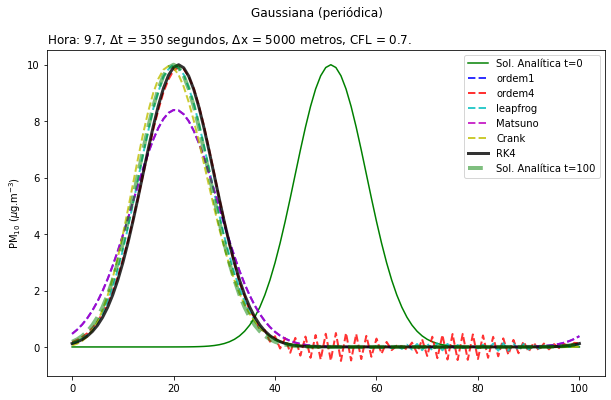

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os
from matplotlib import animation, rc
from functions import *

# Condições do exercício
# ----------------------
Nx, dx, Nt, dt, U  = 101, 5000, 101, 350, 10, 
hora = round((Nt-1)*dt/3600,1)
x, _ = np.linspace(0, (Nx-1)*5000, Nx, retstep = True)
t, _ = np.linspace(0, (Nt-1)*dt, Nt, retstep = True)
CFL     = U*dt/dx       # Courant number  CFL = 1, dt = 500
n, nr =  100, 10
ylabel =  "PM$_{10}$ ($\mu$g.m$^{-3}$)"

# Função (Gaussiana, Retângulo), 
# Cproximação (ordem1, ordem4, leapfrog, Matsuno, Crank, RK4)
# Contorno (fixa, periódica, radiacional)
# --------------------------------------
fun         =  "Gaussiana"          # Gaussiana, Retângulo
cond_front  =  "periódica"          # fixa, periódica, radiacional
aproximations = {'ordem1':"b", 'ordem4':"r", 'leapfrog':"c", 
                'Matsuno':"m", 'Crank':"y", 'RK4':"k"}

C_ref = sol_analytical(fun, x, U, Nx, Nt, nr, dt, t)
Gaus_10 = {}

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(C_ref[:,0], color='g', label="Sol. Analítica t=0")
for aprox, col in aproximations.items():
    Gaus_10[aprox] = sol_num(aprox, cond_front, fun, CFL, nr, Nx, Nt, x, dx, U, t, dt)
    if aprox == "RK4":
        ax.plot(Gaus_10[aprox][:, n], label=aprox, color=col, alpha=.8, lw=3)
    else:
        ax.plot(Gaus_10[aprox][:, n], label=aprox, color=col, alpha=.8, lw=2,linestyle='dashed')

ax.plot(C_ref[:,n], color='g', label=f"Sol. Analítica t={n}", lw=4, alpha=.5, linestyle="dashed")
ax.set_ylabel(ylabel)
ax.set_title(f"Hora: {round((n*dt/3600),1)}, $\Delta$t = {dt} segundos, $\Delta$x = {dx} metros, CFL = {CFL}.",loc='left')
plt.suptitle(fun+f" ({cond_front})")
ax.legend()
#fig.savefig("fig/" + fun[:3] + "_all_" + cond_front[:3] +"_" + str(hora) +".png", 
#               dpi = 300, bbox_inches='tight', facecolor='w')

Text(0, 0.5, 'n')

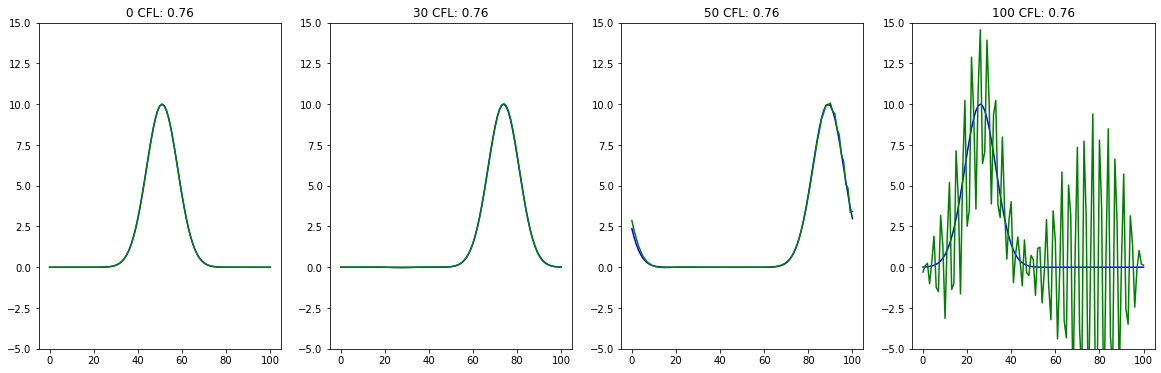

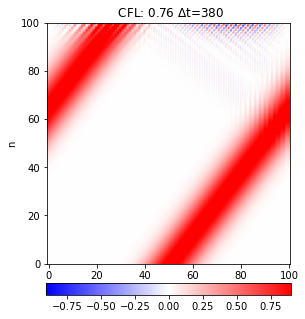

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os
from matplotlib import animation, rc
from functions import *

Nx, dx, Nt, dt, U  = 101, 5000, 101, 380, 10, 
hora = round((Nt-1)*dt/3600,1)
x, _ = np.linspace(0, (Nx-1)*5000, Nx, retstep = True)
t, _ = np.linspace(0, (Nt-1)*dt, Nt, retstep = True)
CFL     = U*dt/dx       # Courant number  CFL = 1, dt = 500

# Função (Gaussiana, Retângulo), 
# Cproximação (ordem1, ordem4, leapfrog, Matsuno, Crank, RK4)
# Contorno (fixa, periódica, radiacional)
# --------------------------------------
fun, aprox, cond_front  =  "Gaussiana", "ordem4", "periódica"
ylabel =  "PM$_{10}$ ($\mu$g.m$^{-3}$)"
dP, nr =  30, 10   

C = np.zeros((Nx, Nt))
C[:,0] = Conc(x, nr)
C_ref = sol_analytical(fun, x, U, Nx, Nt, nr, dt, t)

for n in range(1, Nt):
    if n == 1:  # Euler 2d order scheme for the first time step
        C[1:-1,n] = C[1:-1,n-1] - CFL/2*(C[2:,n-1] - C[:-2,n-1]) 
    elif n > 1:
        C[2:-2, n] = C[2:-2,n-2] - CFL/6*(8*(C[3:-1,n-1]-C[1:-3,n-1])-(C[4:,n-1]-C[:-4,n-1]))

        # Periodic
        C[1,n]   = C[1, n-1] - CFL*(C[1, n-1]- C[0, n-1])
        C[-2, n] = C[-2, n-2] - CFL*(C[-1, n-1] - C[-3, n-1])
        C[ 0, n] = C[100, n-2] - CFL*(C[1, n] - C[99, n-1]) 
        C[-1, n] = C[99, n-2] - CFL/6*(8*(C[100,n-1]-C[98,n-1])-(C[1,n]-C[97,n-1]))
               

fig, axes = plt.subplots(1,4, figsize=(20,6))
for n, ax in zip([0, 30, 50, 100], axes.flatten()):
    ax.plot(C_ref[:,n], color='b')
    ax.plot(C[:,n], color='g')
    ax.set_ylim(-5, 15)
    ax.set_title(str(n)+f" CFL: {round(CFL,3)}")

fig2, axes = plt.subplots(1,figsize=(5,5))
im = axes.imshow(C.T/10, cmap="bwr", vmax=.9, vmin=-.9)
axes.set_title(f" CFL: {round(CFL,3)}"+r" $\Delta$t="+f"{dt}")
plt.colorbar(im, orientation="horizontal", fraction=0.045, pad=0.07)
axes.set_ylim(0,100)
axes.set_ylabel("n")
